## Basics of networkx (continued)...

In [8]:
import networkx as nx

g = nx.Graph()                   #creates undirected graph
                                 #use nx.DiGraph() for directed grahps

g.add_nodes_from(range(10,20))   #adds nodes in the range given (20 exclusive)
g.add_node(20)                   #adds new node

In [9]:
import matplotlib.pyplot as plt
nx.draw(g, with_labels = 1)      #visualize the graph

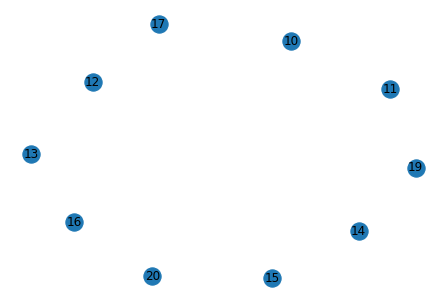

In [10]:
g.remove_node(18)               #removes said node
nx.draw(g, with_labels = 1)

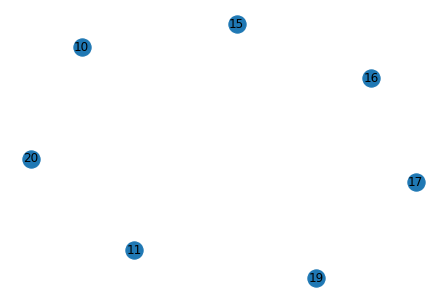

In [11]:
#g.remove_nodes_from([(12,13),(13,14)])  #what's this???
g.remove_nodes_from(range(12,15))#removes nodes in given range(15 exclusive)
nx.draw(g, with_labels = 1)

C:\Users\Public\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


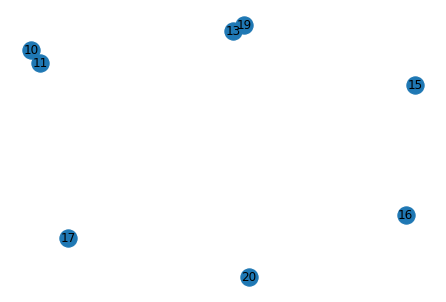

In [12]:
g.add_weighted_edges_from([(10,11,3.0),(13,19,7.5)]) #creates weighted edgess
nx.draw(g, with_labels = 1)

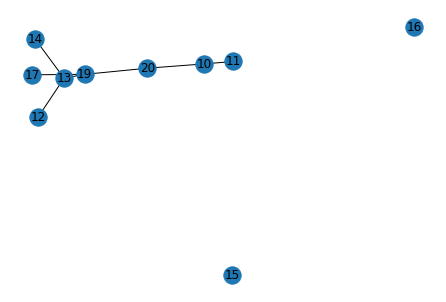

In [13]:
g.add_path([12,13,14])             #creates paths between given  nodes
g.add_path([10,20,19,17])
nx.draw(g, with_labels = 1)

#### Another way to add nodes (from list)

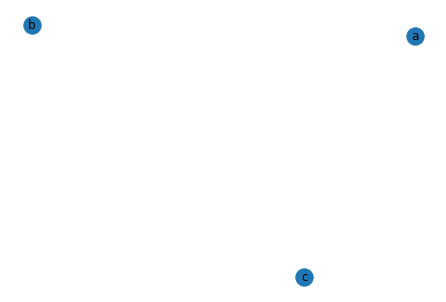

In [14]:
graph = nx.Graph()

listA = [1, 2, 3, 4, 5]
listB = ['a', 'b', 'c']

graph.add_nodes_from(listB)

nx.draw(graph, with_labels = 1)

In [15]:
G = nx.barabasi_albert_graph(50,2) #nx can drawspecific types of graphs

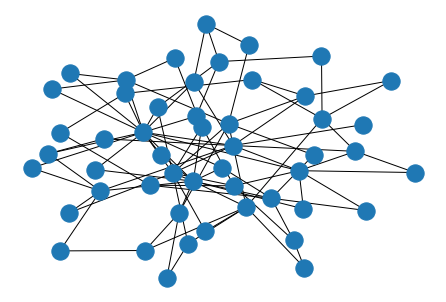

In [16]:
nx.draw_spring(G)       #draws graph with a spring layout (the default should be in spring layout itself)

(array([21., 13.,  7.,  2.,  3.,  0.,  3.,  0.,  0.,  1.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

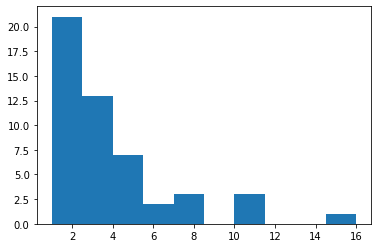

In [17]:
plt.hist([v for k,v in nx.degree(G)])   #plots histogram for num of neighbors each node has
                                        #this graph is highly skewed with one node having more neighbors than any others

In [18]:
nx.diameter(G)                          #prints graph diameter

5

In [19]:
nx.cluster.average_clustering(G)        #not sure

0.16168109668109668

#### Importing from Pandas

In [20]:
import pandas as pd
import numpy as np

nodes = list(range(100))                #create a list of numbers (0-99)

#create a df with 2 rows ('from' & 'to') and 100 columns populated with
#random numbers selected from nodes list (this will be used as the edgelist
# i.e. shows connections between nodes)
df = pd.DataFrame({'from': np.random.choice(nodes, 100), 
                   'to': np.random.choice(nodes, 100)})

In [21]:
df

,from,to
0,15,95
1,44,12
2,74,71
3,71,73
4,59,37
...,...,...
95,62,88
96,84,24
97,56,88
98,60,42


C:\Users\Public\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


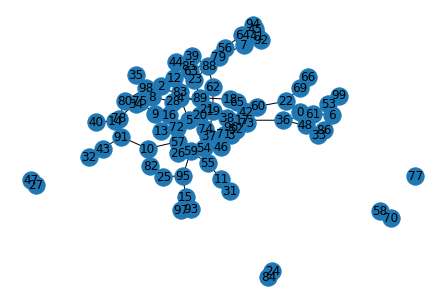

In [22]:
#create graphs with edges randomly created through the df
G = nx.from_pandas_edgelist(df, source='from', target='to')
nx.draw(G, with_labels=1)

(array([29.,  0., 28.,  0.,  0., 16.,  0., 12.,  0.,  3.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

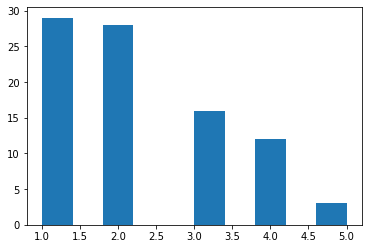

In [23]:
plt.hist([v for k,v in nx.degree(G)])  #much less skewed

### Pickling the graph

In [35]:
import pickle 

filename = 'graph.pkl'            # adding .pkl makes it a pickle (PKL) file
outfile = open(filename, 'wb') 

In [36]:
pickle.dump(G, outfile)           # pickles the graph to outfile (graph.pkl)
outfile.close()

### Unpickling

In [41]:
infile = open(filename, 'rb')
new_graph = pickle.load(infile)
infile.close()

In [42]:
new_graph

In [45]:
new_graph.edges()                 # view edges 

EdgeView([(15, 95), (15, 97), (15, 93), (95, 25), (95, 59), (44, 12), (44, 39), (12, 4), (74, 71), (74, 5), (71, 73), (71, 54), (71, 52), (73, 60), (59, 37), (59, 26), (59, 55), (59, 72), (37, 46), (37, 19), (60, 18), (60, 22), (60, 42), (85, 23), (23, 83), (23, 88), (23, 89), (4, 5), (89, 20), (89, 28), (89, 18), (20, 72), (20, 38), (99, 53), (53, 61), (19, 62), (66, 69), (69, 22), (17, 96), (17, 3), (17, 21), (17, 36), (43, 91), (43, 32), (91, 78), (91, 10), (91, 14), (5, 57), (5, 21), (57, 26), (57, 10), (57, 54), (38, 42), (38, 52), (77, 77), (48, 36), (48, 0), (48, 33), (48, 86), (36, 61), (13, 72), (72, 9), (72, 16), (40, 14), (14, 34), (28, 16), (28, 8), (18, 65), (83, 21), (83, 98), (34, 2), (70, 58), (55, 55), (55, 54), (55, 11), (22, 0), (10, 82), (7, 41), (7, 64), (7, 92), (7, 79), (64, 56), (64, 45), (64, 94), (88, 39), (88, 62), (88, 56), (79, 63), (63, 2), (80, 78), (80, 98), (25, 82), (9, 75), (61, 6), (27, 47), (31, 11), (98, 35), (84, 24)])

C:\Users\Public\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


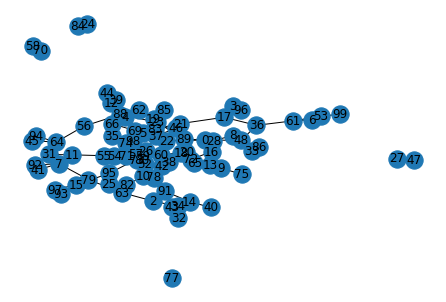

In [44]:
nx.draw(new_graph, with_labels=1) # display graph